In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from Linear_regression import LinearRegression

In [2]:
data = pd.read_csv("IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
label_encoder = preprocessing.LabelEncoder()

In [6]:
data["species"] = label_encoder.fit_transform(data["species"])

In [7]:
data["species"].unique()

array([0, 1, 2])

In [8]:
data = data.drop(["sepal_width", "species"], axis = 1)

In [9]:
data

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


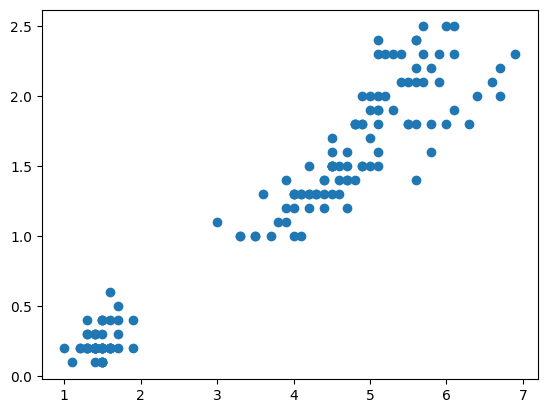

In [10]:
plt.scatter(data["petal_length"], data["petal_width"])
plt.show()

# Linear Regression best fit line formula
y = mx + c
where,
c = intrecept that is what is the value of y axis that the best fit line cuts when the x axis is zero
m = change in y axis according to the x axis

In [11]:
# X = data.drop(["species"], axis=1)
# y = data["species"]

X = data.drop(["petal_width"], axis = 1)
y = data["petal_width"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     sepal_length  petal_length
40            5.0           1.3
10            5.4           1.5
136           6.3           5.6
67            5.8           4.1
1             4.9           1.4
..            ...           ...
77            6.7           5.0
98            5.1           3.0
116           6.5           5.5
86            6.7           4.7
146           6.3           5.0

[135 rows x 2 columns]
40     0.3
10     0.2
136    2.4
67     1.0
1      0.2
      ... 
77     1.7
98     1.1
116    1.8
86     1.5
146    1.9
Name: petal_width, Length: 135, dtype: float64
     sepal_length  petal_length
94            5.6           4.2
101           5.8           5.1
2             4.7           1.3
46            5.1           1.6
9             4.9           1.5
24            4.8           1.9
7             5.0           1.5
107           7.3           6.3
127           6.1           4.9
111           6.4           5.3
68            6.2           4.5
85            6.0           4.5
33      

In [13]:
w = np.zeros(12)

In [14]:
L_regression = LinearRegression()

In [15]:
n_samples, n_features = X_train.shape
n_samples

135

In [16]:
X_train

,sepal_length,petal_length
40,5.0,1.3
10,5.4,1.5
136,6.3,5.6
67,5.8,4.1
1,4.9,1.4
...,...,...
77,6.7,5.0
98,5.1,3.0
116,6.5,5.5
86,6.7,4.7


In [17]:
L_regression.fit(X_train, y_train)

135 2
[-0.00840848  0.34246985]
2.8948690586776625e-05


In [18]:
y_predict = L_regression.predict(X_test)
y_predict

array([1.39131485, 1.69785602, 0.4057199 , 0.50509747, 0.47253218,
       0.61036097, 0.47169133, 2.09620712, 1.6268395 , 1.7613049 ,
       1.48901071, 1.49069241, 0.4332401 , 0.44248943, 1.22092077])

In [19]:
def mean_squared_error(y_test, predictions):
    return np.mean((y_test - predictions) ** 2)

In [20]:
mse = mean_squared_error(y_test, y_predict)
print(mse)

0.05844231797728519


In [21]:
y_pred_line = L_regression.predict(X)